In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [ ]:
sal_data=pd.read_csv('/content/sample_data/Salary_Data.csv')
display(sal_data)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


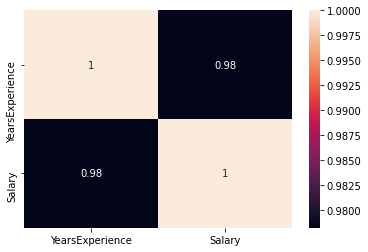

In [ ]:
corr=sal_data.corr()
import seaborn as sns
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
X=sal_data.iloc[:,0:1]
Y=sal_data.iloc[:,1]
linear=LinearRegression()
linear.fit(X,Y)
print(linear.score(X,Y))

0.9569566641435084


In [ ]:
y_predict=linear.predict(X)
df=pd.DataFrame({'YOE':sal_data.iloc[:,0],'Y_Actual':Y,'Y_Predicted':y_predict})
display(df)

,YOE,Y_Actual,Y_Predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [ ]:
new_test_data=np.array([[6.5],[12]])
print('New Sal Predicted',linear.predict(new_test_data))

New Sal Predicted [ 87216.95528813 139191.74805613]


In [ ]:
print("MSE",mean_squared_error(Y,y_predict))
print("R2 Score",r2_score(Y,y_predict))

MSE 31270951.722280964
R2 Score 0.9569566641435086


No handles with labels found to put in legend.


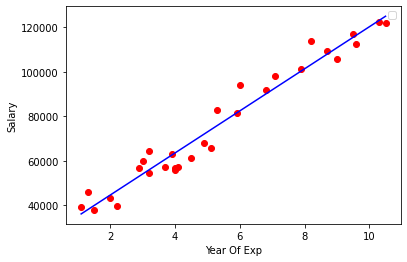

In [ ]:
plt.scatter(X,Y,c='r')
plt.plot(X,y_predict,c='b')
plt.xlabel('Year Of Exp')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
err=[]
g=0
for i in range(len(Y)):
  x=(Y[i]-y_predict[i])**2
  err.append(x)
  g=g+x
print('SSE',g)

SSE 938128551.668429


In [ ]:
x=0
for i in range(len(err)):
  x=x+err[i]
print('MSE',x/len(err))

MSE 31270951.722280968


In [ ]:
v=np.var(err)
print('Varience',v)

Varience 1121178985697117.4


In [ ]:
print("AVG Erorr",np.mean(v))

AVG Erorr 1121178985697117.4


In [ ]:
m=np.mean(Y)
print('Avg of Observed Values',m)

Avg of Observed Values 76003.0


In [ ]:
y=0
for i in range(len(Y)):
  y=y+(Y[i]-m)**2
print("Total Sum of Squre",y)

Total Sum of Squre 21794977852.0


In [ ]:
print("R2 Score ",1-(g/y)) # 1-(SUM of SQUARE/RESIDUAL ERROR (SSE))

R2 Score  0.9569566641435086


**MULTILINEAR REGRESSION**

In [ ]:
from sklearn.datasets import load_boston
boston_data=load_boston()

In [ ]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X=boston_data.data
Y=boston_data.target
feature_name=boston_data.feature_names
print(X.shape)
print(Y.shape)
print(feature_name)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
df=pd.DataFrame(data=X,columns=feature_name)
df['Price']=pd.Series(Y)
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


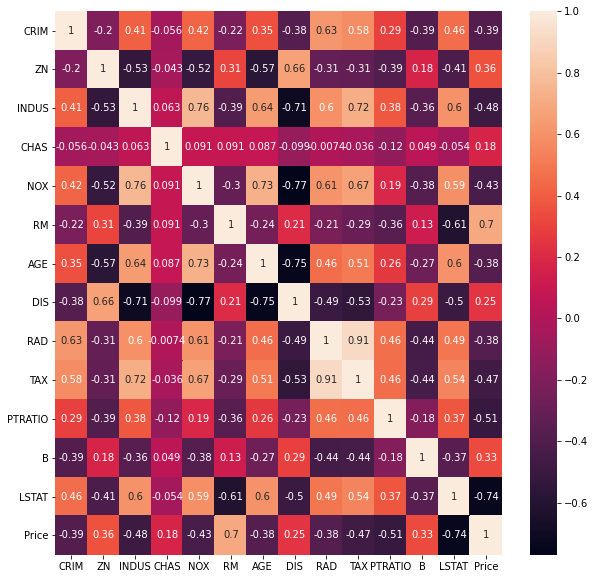

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

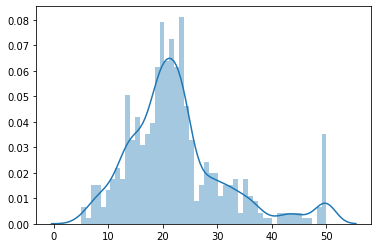

In [ ]:
sns.distplot(Y,bins=50)
plt.show()

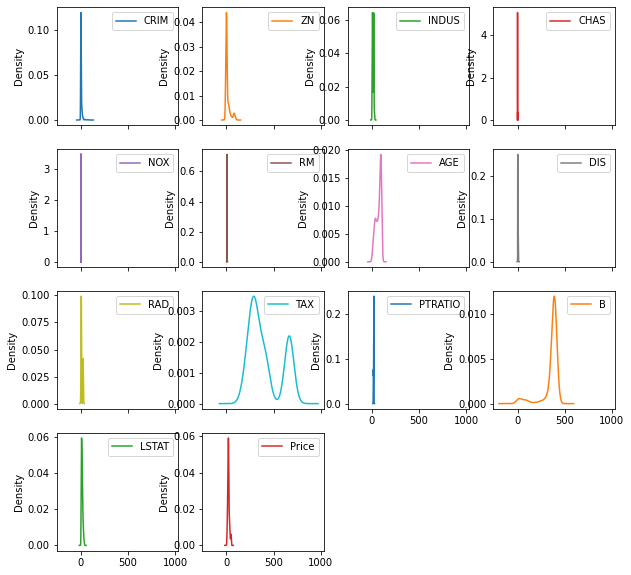

In [ ]:
df.plot(kind='density',layout=(4,4),subplots=True,figsize=(10,10))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
norm=Normalizer()
X_nor=norm.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_nor,Y,test_size=.33,random_state=0)
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)
Y_predict=lr_model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Training Score",lr_model.score(X_train,Y_train))
print("Test Score",lr_model.score(X_test,Y_test))
print('R2 Score ',r2_score(Y_test,Y_predict))

Training Score 0.7708584721452035
Test Score 0.6745724906876805
R2 Score  0.6745724906876805


In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(lr_model.predict(X_test),)